In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

data_list = []
for i in range(7):
    data = pd.read_csv('FIFA-Dataplayers_' + str(15 + i) + '.csv').set_index('sofifa_id')
    data_list.append(data)

In [2]:
ndata_list = []
for i in range(6):
    next_yr_value = data_list[i+1]['value_eur']
    #ndata_list.append(data_list[i].join(next_yr_value, how='left', rsuffix='_next').fillna(0))
    ndata_list.append(data_list[i])
    ndata_list[i]['value_eur_next'].fillna(0)

In [3]:
# get rid of cases where value euro next is 0 and value euro is 0 and get rid of goalkeepers
ndata_list2 = []
for i, j in enumerate(ndata_list):
    ndata_list2.append(j.where(j['value_eur_next']!=0.0).dropna(how='all'))
    ndata_list2[i] = ndata_list2[i].where(ndata_list2[i]['team_position']!='GK').dropna(how='all')

In [6]:
# Below is the set of columns we care about

features = ['age'
            ,'height_cm'
           ,'weight_kg'
           ,'overall'
           ,'potential'
           ,'pace'
           ,'shooting'
           ,'passing'
           ,'defending'
           ,'dribbling'
           ,'physic']

filtered_data = []
ys = []
for d in ndata_list2:
    filtered_data.append(d[features].fillna(0))
    ys.append(d['value_eur_next'].fillna(0))
filtered_data[0]

,age,height_cm,weight_kg,overall,potential,pace,shooting,passing,defending,dribbling,physic
sofifa_id,,,,,,,,,,,
158023,27.0,169.0,67.0,93.0,95.0,93.0,89.0,86.0,27.0,96.0,63.0
20801,29.0,185.0,80.0,92.0,92.0,93.0,93.0,81.0,32.0,91.0,79.0
9014,30.0,180.0,80.0,90.0,90.0,93.0,86.0,83.0,32.0,92.0,64.0
41236,32.0,195.0,95.0,90.0,90.0,76.0,91.0,81.0,34.0,86.0,86.0
176580,27.0,181.0,81.0,89.0,91.0,83.0,87.0,79.0,42.0,88.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...
222997,18.0,174.0,70.0,42.0,54.0,46.0,32.0,42.0,32.0,45.0,47.0
220806,17.0,187.0,81.0,41.0,61.0,66.0,25.0,29.0,39.0,30.0,53.0
225509,17.0,178.0,57.0,41.0,50.0,64.0,41.0,27.0,27.0,35.0,41.0


In [7]:
n = len(filtered_data[0])
t1 = int(0.65*n)
t2 = int(0.8*n)
index_shuffle = np.array(filtered_data[0].index)
np.random.shuffle(index_shuffle)

train_x = filtered_data[0].loc[index_shuffle[0:t1]]
validate_x = filtered_data[0].loc[index_shuffle[t1:t2]]
test_x = filtered_data[0].loc[index_shuffle[t2:n]]

train_y = ys[0].loc[index_shuffle[0:t1]]
validate_y = ys[0].loc[index_shuffle[t1:t2]]
test_y = ys[0].loc[index_shuffle[t2:n]]
train_log_y = np.log(train_y)
validate_log_y = np.log(validate_y)
test_log_y = np.log(test_y)
train_log_y.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
validate_log_y.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
test_log_y.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
model = LinearRegression()
model.fit(train_x,train_y)
pred = model.coef_.reshape(11,1)

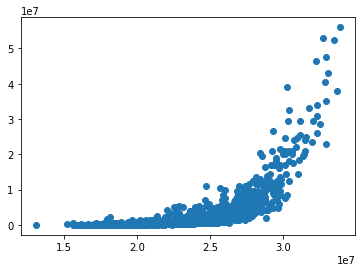

In [8]:
pred_vector = test_x@pred

plt.scatter(pred_vector,test_y)

In [9]:
for i in range(len(filtered_data)):
    n = len(filtered_data[i])
    t1 = int(0.65*n)
    t2 = int(0.8*n)
    index_shuffle = np.array(filtered_data[i].index)
    np.random.shuffle(index_shuffle)

    train_x_i = filtered_data[i].loc[index_shuffle[0:t1]]
    validate_x_i = filtered_data[i].loc[index_shuffle[t1:t2]]
    test_x_i = filtered_data[i].loc[index_shuffle[t2:n]]

    train_y_i = ys[i].loc[index_shuffle[0:t1]]
    validate_y_i = ys[i].loc[index_shuffle[t1:t2]]
    test_y_i = ys[i].loc[index_shuffle[t2:n]]
    
    train_log_y_i = np.log(train_y_i)
    validate_log_y_i = np.log(validate_y_i)
    test_log_y_i = np.log(test_y_i)
    train_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    validate_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    test_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    if i == 0:
        train_x = train_x_i
        validate_x = validate_x_i
        test_x = test_x_i
        train_y = train_y_i
        validate_y = validate_y_i
        test_y = test_y_i        
        train_log_y = train_log_y_i
        validate_log_y = validate_log_y_i
        test_log_y = test_log_y_i  
    else:
        train_x = train_x.append(train_x_i)
        validate_x = validate_x.append(validate_x_i)
        test_x = test_x.append(test_x_i)
        train_y = train_y.append(train_y_i)
        validate_y = validate_y.append(validate_y_i)
        test_y = test_y.append(test_y_i)        
        train_log_y = train_log_y.append(train_log_y_i)
        validate_log_y = validate_log_y.append(validate_log_y_i)
        test_log_y = test_log_y.append(test_log_y_i)
    model = LinearRegression()
    model.fit(train_x,train_y)
    pred = model.coef_.reshape(11,1)

In [10]:
U,S,V = np.linalg.svd(train_x,full_matrices = False)

Text(0.5, 1.0, 'Normalized Eigenvalues vs. k')

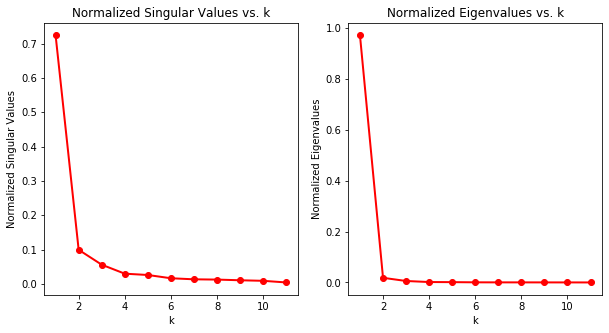

In [11]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(range(1,len(S)+1), S/np.sum(S), 'ro-', linewidth=2)
ax[0].set_ylabel('Normalized Singular Values')
ax[0].set_xlabel('k')
ax[0].set_title('Normalized Singular Values vs. k')
eigvals = S**2 / np.sum(S**2)
ax[1].plot(range(1,len(S)+1), eigvals, 'ro-', linewidth=2)
ax[1].set_ylabel('Normalized Eigenvalues')
ax[1].set_xlabel('k')
ax[1].set_title('Normalized Eigenvalues vs. k')

Text(0.5, 1.0, 'Choose k based on constant (c)')

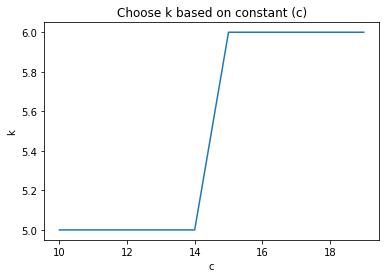

In [12]:
c_range = range(10,20)
c_list = np.zeros(len(c_range))
for c in range(len(c_range)):
    for k in range(len(S)):
        if np.sum(S[:k]) >= np.sum(S[k:])*c_range[c]:
            c_list[c] = k
            break
plt.plot(c_range,c_list)
plt.xlabel('c')
plt.ylabel('k')
plt.title('Choose k based on constant (c)')

In [13]:
for f in range(4,7):
    train_pca = train_x@V[0:f].T
    validate_pca = validate_x@V[0:f].T

    model = LinearRegression()
    model.fit(train_pca,train_y)
    pred = model.coef_.reshape(f,1)

    pred_vector = validate_pca@pred
    print(f, np.mean((validate_y - np.array(pred_vector).reshape(len(pred_vector),))**2))

4 2092783124736077.0
5 5156419207903273.0
6 1826675938029147.2


Validation chooses k = 6

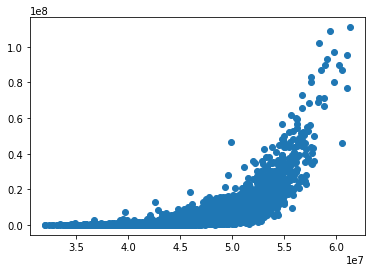

In [14]:
f = 6
train_pca = train_x@V[0:f].T
test_pca = test_x@V[0:f].T

model = LinearRegression()
model.fit(train_pca,train_y)
pred = model.coef_.reshape(f,1)

pred_vector = test_pca@pred
plt.scatter(pred_vector,test_y)

In [15]:
np.mean((test_y - np.array(pred_vector).reshape(len(pred_vector),))**2)

1824608083396435.5

In [16]:
for f in range(4,7):
    train_pca = train_x@V[0:f].T
    validate_pca = validate_x@V[0:f].T

    model = LinearRegression()
    model.fit(train_pca,train_log_y)
    pred = model.coef_.reshape(f,1)

    pred_vector = validate_pca@pred
    print(f, np.mean((validate_y - np.exp(np.array(pred_vector).reshape(len(pred_vector),)))**2))

4 186334736518652.03
5 3.7884515581692755e+21
6 7312693854054.82


Validation choose k = 6

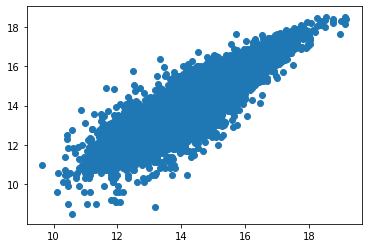

In [17]:
f = 6
train_pca = train_x@V[0:f].T
test_pca = test_x@V[0:f].T

model = LinearRegression()
model.fit(train_pca,train_log_y)
pred = model.coef_.reshape(f,1)

pred_vector = test_pca@pred
plt.scatter(pred_vector,test_log_y)

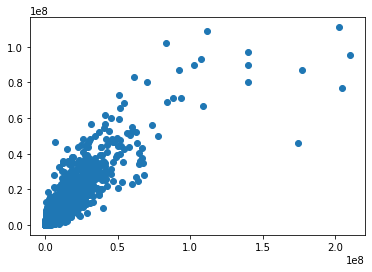

In [18]:
plt.scatter(np.exp(pred_vector),test_y)

In [19]:
np.mean((test_y - np.exp(np.array(pred_vector).reshape(len(pred_vector),)))**2)

11705466652067.41

Note this is 14 trillion versus the above MSE without taking the log of 1.8 quadrillion

In [23]:
# get rid of cases where value euro next is 0 and value euro is 0 and get rid of goalkeepers
ndata_list3 = []
for i, j in enumerate(ndata_list):
    ndata_list3.append(j.where(j['value_eur_next']!=0.0).dropna(how='all'))
    ndata_list3[i] = ndata_list3[i].where(ndata_list3[i]['team_position']=='GK').dropna(how='all')

In [30]:
# Below is the set of columns we care about

features = ['age'
            ,'height_cm'
           ,'weight_kg'
           ,'overall'
           ,'potential'
           ,'gk_diving'
           ,'gk_reflexes'
           ,'gk_handling'
           ,'gk_kicking'
           ,'gk_speed'
           ,'gk_positioning']

filtered_data = []
ys = []
for d in ndata_list3:
    filtered_data.append(d[features].fillna(0))
    ys.append(d['value_eur_next'].fillna(0))
filtered_data[0]

,age,height_cm,weight_kg,overall,potential,gk_diving,gk_reflexes,gk_handling,gk_kicking,gk_speed,gk_positioning
sofifa_id,,,,,,,,,,,
167495,28.0,193.0,92.0,90.0,90.0,87.0,86.0,85.0,92.0,60.0,90.0
192119,22.0,199.0,88.0,86.0,90.0,84.0,88.0,87.0,69.0,49.0,86.0
167948,27.0,188.0,78.0,85.0,86.0,86.0,88.0,81.0,71.0,64.0,81.0
168435,27.0,192.0,80.0,84.0,85.0,85.0,87.0,79.0,73.0,51.0,84.0
5479,33.0,185.0,84.0,84.0,84.0,87.0,88.0,79.0,67.0,64.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...
212763,19.0,179.0,76.0,53.0,64.0,54.0,55.0,52.0,49.0,51.0,52.0
201354,21.0,186.0,81.0,53.0,62.0,50.0,58.0,50.0,48.0,46.0,52.0
222070,23.0,191.0,92.0,51.0,58.0,56.0,55.0,49.0,52.0,44.0,43.0


In [31]:
for i in range(len(filtered_data)):
    n = len(filtered_data[i])
    t1 = int(0.65*n)
    t2 = int(0.8*n)
    index_shuffle = np.array(filtered_data[i].index)
    np.random.shuffle(index_shuffle)

    train_x_i = filtered_data[i].loc[index_shuffle[0:t1]]
    validate_x_i = filtered_data[i].loc[index_shuffle[t1:t2]]
    test_x_i = filtered_data[i].loc[index_shuffle[t2:n]]

    train_y_i = ys[i].loc[index_shuffle[0:t1]]
    validate_y_i = ys[i].loc[index_shuffle[t1:t2]]
    test_y_i = ys[i].loc[index_shuffle[t2:n]]
    
    train_log_y_i = np.log(train_y_i)
    validate_log_y_i = np.log(validate_y_i)
    test_log_y_i = np.log(test_y_i)
    train_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    validate_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    test_log_y_i.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
    if i == 0:
        train_x = train_x_i
        validate_x = validate_x_i
        test_x = test_x_i
        train_y = train_y_i
        validate_y = validate_y_i
        test_y = test_y_i        
        train_log_y = train_log_y_i
        validate_log_y = validate_log_y_i
        test_log_y = test_log_y_i  
    else:
        train_x = train_x.append(train_x_i)
        validate_x = validate_x.append(validate_x_i)
        test_x = test_x.append(test_x_i)
        train_y = train_y.append(train_y_i)
        validate_y = validate_y.append(validate_y_i)
        test_y = test_y.append(test_y_i)        
        train_log_y = train_log_y.append(train_log_y_i)
        validate_log_y = validate_log_y.append(validate_log_y_i)
        test_log_y = test_log_y.append(test_log_y_i)
    model = LinearRegression()
    model.fit(train_x,train_y)
    pred = model.coef_.reshape(11,1)

In [32]:
U,S,V = np.linalg.svd(train_x,full_matrices = False)

Text(0.5, 1.0, 'Normalized Eigenvalues vs. k')

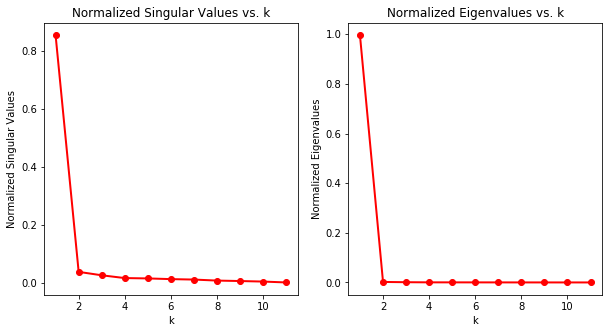

In [33]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(range(1,len(S)+1), S/np.sum(S), 'ro-', linewidth=2)
ax[0].set_ylabel('Normalized Singular Values')
ax[0].set_xlabel('k')
ax[0].set_title('Normalized Singular Values vs. k')
eigvals = S**2 / np.sum(S**2)
ax[1].plot(range(1,len(S)+1), eigvals, 'ro-', linewidth=2)
ax[1].set_ylabel('Normalized Eigenvalues')
ax[1].set_xlabel('k')
ax[1].set_title('Normalized Eigenvalues vs. k')

Text(0.5, 1.0, 'Choose k based on constant (c)')

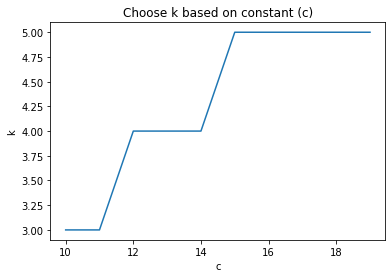

In [34]:
c_range = range(10,20)
c_list = np.zeros(len(c_range))
for c in range(len(c_range)):
    for k in range(len(S)):
        if np.sum(S[:k]) >= np.sum(S[k:])*c_range[c]:
            c_list[c] = k
            break
plt.plot(c_range,c_list)
plt.xlabel('c')
plt.ylabel('k')
plt.title('Choose k based on constant (c)')

In [35]:
for f in range(3,6):
    train_pca = train_x@V[0:f].T
    validate_pca = validate_x@V[0:f].T

    model = LinearRegression()
    model.fit(train_pca,train_y)
    pred = model.coef_.reshape(f,1)

    pred_vector = validate_pca@pred
    print(f, np.mean((validate_y - np.array(pred_vector).reshape(len(pred_vector),))**2))

3 3669347373658680.0
4 4225437683010594.0
5 4931354498636486.0


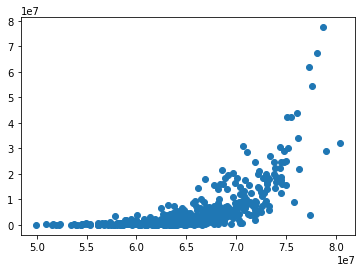

In [36]:
f = 3
train_pca = train_x@V[0:f].T
test_pca = test_x@V[0:f].T

model = LinearRegression()
model.fit(train_pca,train_y)
pred = model.coef_.reshape(f,1)

pred_vector = test_pca@pred
plt.scatter(pred_vector,test_y)

In [37]:
np.mean((test_y - np.array(pred_vector).reshape(len(pred_vector),))**2)

3654670733194974.0

In [38]:
for f in range(3,6):
    train_pca = train_x@V[0:f].T
    validate_pca = validate_x@V[0:f].T

    model = LinearRegression()
    model.fit(train_pca,train_log_y)
    pred = model.coef_.reshape(f,1)

    pred_vector = validate_pca@pred
    print(f, np.mean((validate_y - np.exp(np.array(pred_vector).reshape(len(pred_vector),)))**2))

3 12985827017759.906
4 414022870335134.0
5 7887965077394753.0


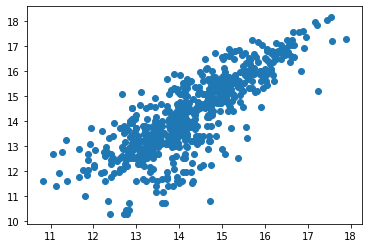

In [39]:
f = 3
train_pca = train_x@V[0:f].T
test_pca = test_x@V[0:f].T

model = LinearRegression()
model.fit(train_pca,train_log_y)
pred = model.coef_.reshape(f,1)

pred_vector = test_pca@pred
plt.scatter(pred_vector,test_log_y)

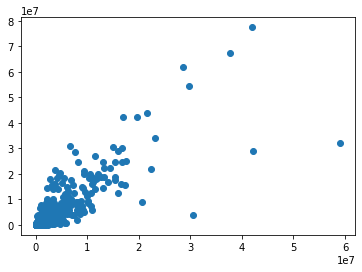

In [40]:
plt.scatter(np.exp(pred_vector),test_y)

In [41]:
np.mean((test_y - np.exp(np.array(pred_vector).reshape(len(pred_vector),)))**2)

23677616028144.117

In [42]:
np.sqrt(23677616028144.117)

4865965.066473876